In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from utils import get_regression_metrics
from utils import get_classifier_metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [14]:
df = pd.read_csv("/workspaces/Gupir11-machine-learning/data/processed/df_diabetes")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## Split

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
y.unique()

array([1, 0])

Siendo 0 negativo en diabetes y 1, positivo 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=18, stratify=y
)



## Modelo y ajuste


In [18]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:

y_pred = tree_clf.predict(X_test)


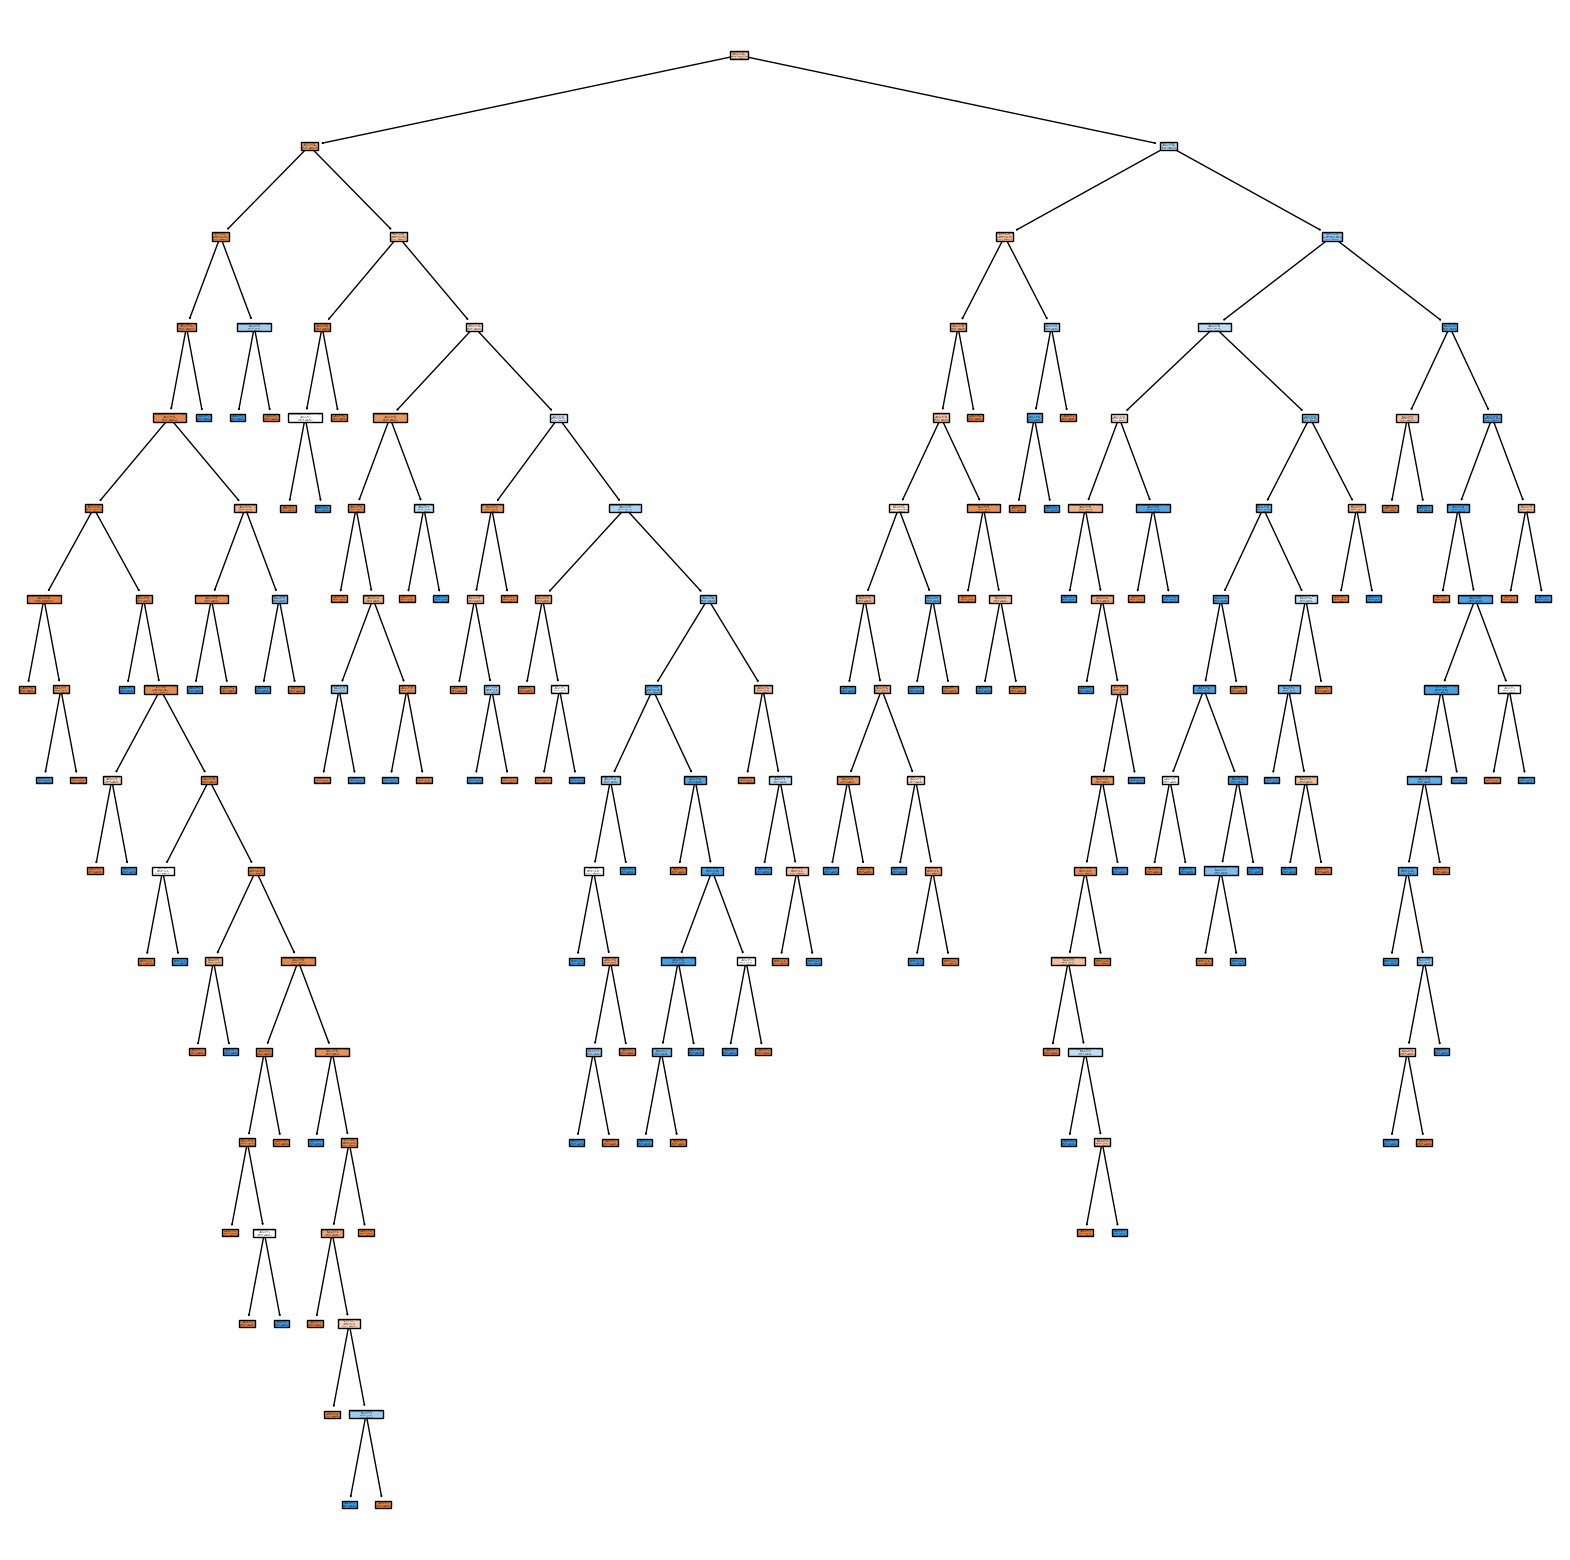

In [20]:
plt.figure(figsize=(20, 20))

tree.plot_tree(tree_clf,
               feature_names=list(X_train.columns),
               class_names=['negativo', 'positivo'],
               filled=True)
plt.show()

In [21]:
y_pred_test = tree_clf.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [22]:
y_pred_train = tree_clf.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [23]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.688312,0.688312,0.688312


In [24]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, 'macro')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.657778,0.657778,0.657778


In [25]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='weighted')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.688312,0.688312,0.688312


El modelo de árbol de decisión entrenado inicialmente mostró un fuerte sobreajuste, alcanzando un 100% de exactitud en el conjunto de entrenamiento pero solo un 68% en el conjunto de prueba. Esta diferencia evidenció que el árbol estaba memorizando los datos de entrenamiento en lugar de aprender patrones generalizables.

Se hara optimizacion para intentar mejorar el resultado con GridSearchCV

In [26]:
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1           # usa todos los núcleos del CPU
)

In [27]:
grid.fit(X_train, y_train)
f'mejores hiperparametros {grid.best_params_} Mejor accuracy en CV: {grid.best_score_}'
best_tree = grid.best_estimator_

In [28]:
y_pred_best = best_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nReporte:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.6818181818181818

Reporte:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.54      0.57      0.56        54

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.69      0.68      0.68       154



Después de optimizar el árbol de decisión, el modelo quedó mucho más equilibrado. Ya no se “aprende de memoria” los datos como antes, y aunque la precisión en el test sigue rondando el 68%, ahora el modelo generaliza mejor. Funciona bastante bien para identificar a personas sin diabetes, pero le cuesta un poco más detectar a quienes sí la tienen, algo normal porque hay menos casos positivos en el dataset. En resumen: el modelo quedó más estable, más realista y mucho menos sobreajustado.